In [104]:
#Importing data from csv
from pandas import read_csv
import pandas as pd
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

protoss_data = read_csv('../Output/ProtossMarch.csv', header=0, index_col=False)
demoP = read_csv('../Output/wedDemoProtoss.csv', header=0, index_col=False)
display(demoP)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
0,233,Eternal Empire LE,us,926,P,Z,0.0,1,0,Player 1 - Stats (Protoss),12,12,15,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,233,Eternal Empire LE,us,926,P,Z,116.2,480,30,Player 1 - Stats (Protoss),13,14,15,35,643,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,233,Eternal Empire LE,us,926,P,Z,124.6,960,60,Player 1 - Stats (Protoss),15,16,23,5,783,200,1250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,233,Eternal Empire LE,us,926,P,Z,196.0,1440,90,Player 1 - Stats (Protoss),17,18,23,85,979,275,1350,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,17,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,233,Eternal Empire LE,us,926,P,Z,165.2,1920,120,Player 1 - Stats (Protoss),19,20,23,415,923,200,1525,0,0,16,67,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,233,Eternal Empire LE,us,926,P,Z,137.2,2400,150,Player 1 - Stats (Protoss),20,21,23,50,895,675,1725,0,0,60,134,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
6,233,Eternal Empire LE,us,926,P,Z,168.0,2880,180,Player 1 - Stats (Protoss),22,23,23,175,951,700,1900,0,0,116,156,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,22,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
7,233,Eternal Empire LE,us,926,P,Z,182.0,3360,210,Player 1 - Stats (Protoss),24,27,31,155,923,700,2250,0,0,53,313,175,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,24,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
8,233,Eternal Empire LE,us,926,P,Z,177.8,3840,240,Player 1 - Stats (Protoss),27,33,46,50,1035,350,2900,100,0,94,313,175,25,25,0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,27,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
9,233,Eternal Empire LE,us,926,P,Z,140.0,4320,270,Player 1 - Stats (Protoss),31,39,46,150,1343,350,3350,200,0,110,335,100,200,50,0,2,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,31,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [105]:
new_data = pd.concat([protoss_data.reset_index(drop=True), demoP.reset_index(drop=True)], axis=0, ignore_index=True)
display(new_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win
0,0,World of Sleepers LE,us,437,P,T,0.0,1,0,Player 2 - Harstem (Protoss),12,12,15,50,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,World of Sleepers LE,us,437,P,T,155.4,480,30,Player 2 - Harstem (Protoss),13,14,15,50,727,150,1050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,World of Sleepers LE,us,437,P,T,183.4,960,60,Player 2 - Harstem (Protoss),15,16,23,115,867,125,1250,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,World of Sleepers LE,us,437,P,T,148.4,1440,90,Player 2 - Harstem (Protoss),18,19,23,135,951,200,1475,0,0,12,44,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,18,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,World of Sleepers LE,us,437,P,T,152.6,1920,120,Player 2 - Harstem (Protoss),19,20,23,65,895,600,1525,0,0,56,111,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,19,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76362,233,Eternal Empire LE,us,926,P,Z,163.8,18720,1170,Player 1 - Stats (Protoss),77,172,196,900,2491,0,15900,5875,9875,230,1097,0,3650,3000,4025,1,1,6,0,0,1,0,0,0,0,1,0,4,10,0,0,0,4,0,1,1,0,77,17,0,0,2,0,1,14,1,0,1,1,1,8,1,1,1
76363,233,Eternal Empire LE,us,926,P,Z,201.6,19200,1200,Player 1 - Stats (Protoss),72,175,173,645,1595,500,15500,6300,11200,368,963,0,3700,3050,4225,1,1,6,0,0,1,0,0,0,0,1,0,4,10,0,0,0,4,0,1,1,0,72,17,0,0,2,0,1,15,1,0,1,1,1,8,1,4,1
76364,233,Eternal Empire LE,us,926,P,Z,196.0,19680,1230,Player 1 - Stats (Protoss),72,181,181,350,1679,400,15975,6675,11700,342,873,0,3850,3200,4425,1,1,6,0,0,1,0,0,0,0,1,0,4,10,0,0,0,4,0,1,1,0,72,17,0,0,2,0,1,18,1,0,1,1,1,8,1,4,1
76365,233,Eternal Empire LE,us,926,P,Z,50.4,20160,1260,Player 1 - Stats (Protoss),72,171,189,770,1483,400,15475,6075,12300,674,918,0,3650,3000,4625,1,1,6,0,0,1,0,0,0,0,1,0,4,10,0,0,0,4,0,1,1,0,72,18,0,0,2,0,1,14,1,0,1,1,1,8,1,3,1


In [106]:
#Training and validation data set
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(new_data) if x not in no_normalize]

#Normalizing these columns
norm = new_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
protoss_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=new_data.index)

#One-hot Encoding the categorical variables
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(new_data['map_name'], prefix='Map'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(new_data['region'], prefix='Region'))
protoss_data_normalized = protoss_data_normalized.join(pd.get_dummies(new_data['enemy_race'], prefix='Enemy'))

#Displaying first and last 5 rows
display(protoss_data_normalized.head(5), protoss_data_normalized.tail(5))

print("Number of columns: ", len(protoss_data_normalized.columns))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win,Map_Acropolis LE,Map_Année zéro EC,Map_Aura de mort EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
0,0.000000,0.099174,0.045685,0.032967,0.004451,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.099174,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0.310056,0.107438,0.055838,0.032967,0.004451,0.170858,0.03750,0.001457,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.107438,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0.365922,0.123967,0.065990,0.050549,0.010237,0.203760,0.03125,0.007287,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.123967,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.296089,0.148760,0.081218,0.050549,0.012017,0.223502,0.05000,0.013844,0.0,0.0,0.001263,0.022077,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.148760,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0.304469,0.157025,0.086294,0.050549,0.005786,0.210341,0.15000,0.015302,0.0,0.0,0.005893,0.055695,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.157025,0.025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,vespene_current,vespene_collection_rate,vespene_used_in_progress,vespene_used_current,vespene_used_active_forces,vespene_lost,adept,archon,assimilator,carrier,colossus,cyberneticscore,darkshrine,darktemplar,disruptor,fleetbeacon,forge,gateway,hightemplar,immortal,interceptor,mothership,mothershipcore,nexus,observer,oracle,phoenix,photoncannon,probe,pylon,reactor,roboticsbay,roboticsfacility,sentry,shieldbattery,stalker,stargate,tempest,templararchive,twilightcouncil,voidray,warpgate,warpprism,zealot,win,Map_Acropolis LE,Map_Année zéro EC,Map_Aura de mort EC,Map_Automaton LE,Map_Baie du Roi EC,Map_Blueshift LE,Map_Cerulean Fall LE,Map_Croisement de Kairos EC,Map_Cyber Forest LE,Map_Deathaura LE,Map_Disco Bloodbath LE,Map_Empire éternel EC,Map_Ephemeron LE,Map_Eternal Empire LE,Map_Ever Dream LE,Map_Glace et chrome EC,Map_Golden Wall LE,Map_Ice and Chrome LE,Map_Kairos Junction LE,Map_King's Cove LE,Map_Mur doré EC,Map_New Repugnancy LE,Map_Nightshade LE,Map_Para Site LE,Map_Pillars of Gold LE,Map_Port Aleksander EC,Map_Port Aleksander LE,Map_Simulacrum LE,Map_Stasis LE,Map_Submarine LE,Map_Thunderbird LE,Map_Triton LE,Map_Winter's Gate LE,Map_World of Sleepers LE,Map_Year Zero LE,Map_Zen LE,Map_冰雪合金-天梯版,Map_死亡光环-天梯版,Map_永恒帝国-天梯版,Map_永恒梦境-天梯版,Map_潜水艇-天梯版,Map_黄金之柱-天梯版,Map_黄金墙-天梯版,Map_골든 월 - 래더,Map_뉴 리퍼그넌시 - 래더,Map_데스오라 - 래더,Map_디스코 블러드배스 - 래더,Map_사이버 포레스트 - 래더,Map_서브머린 - 래더,Map_썬더버드 - 래더,Map_아이스 앤 크롬 - 래더,Map_아크로폴리스 - 래더,Map_에버 드림 - 래더,Map_월드 오브 슬리퍼스 - 래더,Map_윈터스 게이트 - 래더,Map_이터널 엠파이어 - 래더,Map_이페머론 - 래더,Map_카이로스 정션 - 래더,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_포트 알렉산더 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
76362,0.326816,0.636364,0.857868,0.430769,0.080114,0.585429,0.00000,0.434276,0.425416,0.135521,0.024203,0.550426,0.000000,0.349282,0.346821,0.137138,0.029412,0.055556,0.333333,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.25,0.0,0.181818,0.588235,0.0,0.0,0.0,0.4,0.0,0.052632,0.047619,0.0,0.636364,0.425,0.0,0.0,0.25,0.0,0.016393,0.218750,0.111111,0.0,0.5,0.5,0.038462,0.363636,0.25,0.025,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
76363,0.402235,0.595041,0.873096,0.380220,0.057415,0.374853,0.12500,0.422617,0.456191,0.153705,0.038725,0.483191,0.000000,0.354067,0.352601,0.143952,0.029412,0.055556,0.333333,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.25,0.0,0.181818,0.588235,0.0,0.0,0.0,0.4,0.0,0.052632,0.047619,0.0,0.595041,0.425,0.0,0.0,0.25,0.0,0.016393,0.234375,0.111111,0.0,0.5,0.5,0.038462,0.363636,0.25,0.100,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
76364,0.391061,0.595041,0.903553,0.397802,0.031155,0.394595,0.10000,0.436462,0.483345,0.160567,0.035989,0.438033,0.000000,0.368421,0.369942,0.150767,0.029412,0.055556,0.333333,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.25,0.0,0.181818,0.588235,0.0,0.0,0.0,0.4,0.0,0.052632,0.047619,0.0,0.595041,0.425,0.0,0.0,0.25,0.0,0.016393,0.281250,0.111111,0.0,0.5,0.5,0.038462,0.363636,0.25,0.100,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
76365,0.100559,0.595041,0.852792,0.415385,0.068542,0.348531,0.10000,0.421889,0.439899,0.168801,0.070925,0.460612,0.000000,0.349282,0.346821,0.157581,0.029412,0.055556,0.333333,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.25,0.0,0.181818,0.588235,0.0,0.0,0.0,0.4,0.0,0.052632,0.047619,0.0,0.595041,0.450,0.0,0.0,0.25,0.0,0.016393,0.218750,0.111111,0.0,0.5,0.5,0.038462,0.363636,0.25,0.075,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
76366,0.000000,0.595041,0.822335,0.448352,0.027150,0.322209,0.04375,0.425532,0.419986,0.

Number of columns:  124


In [107]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(protoss_data_normalized) if x not in no_X]

Y = protoss_data_normalized['win']
X_normalized = protoss_data_normalized[yes_X]

In [108]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(protoss_data)
num_val = int(val_split * num_data)
num_train = int(train_split * num_data)
num_test = len(demoP)

Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)+1]
Y_test = Y[(num_val + num_train)+1:]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)+1]
X_normalized_test = X_normalized[(num_val + num_train)+1:]

In [109]:
Y_test = pd.DataFrame(Y_test)
Y_val = pd.DataFrame(Y_val)
Y_train = pd.DataFrame(Y_train)

In [110]:
Y_train = Y_train.values.reshape((-1,1))
Y_val = Y_val.values.reshape((-1,1))
Y_test = Y_test.values.reshape((-1,1))

In [111]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(61058, 1)
(15265, 1)
(44, 1)


In [112]:
print(X_normalized_train.shape)
print(X_normalized_val.shape)
print(X_normalized_test.shape)

(61058, 123)
(15265, 123)
(44, 123)


In [113]:
win_length = 1
batch_size = 32
num_features = len(yes_X)
train_generator = TimeseriesGenerator(X_normalized_train, Y_train, length = win_length,
                                     sampling_rate=1, batch_size = batch_size)
val_generator = TimeseriesGenerator(X_normalized_val, Y_val, length = win_length,
                                     sampling_rate=1, batch_size = batch_size)
test_generator = TimeseriesGenerator(X_normalized_test, Y_test, length = win_length,
                                     sampling_rate=1, batch_size = batch_size)

In [114]:
val_performance = {}
performance = {}

Y_Time = []
timer = 21;
for i in range(0,len(Y_test)-1):
    Y_Time.append(timer)
    timer += 21
    
Y_demo_test = Y_test[1:]

In [122]:
#DENSE MODEL

dense_model = tf.keras.Sequential()
dense_model.add(tf.keras.layers.Dense(units=123, activation='sigmoid', input_shape=(win_length, num_features)))
dense_model.add(tf.keras.layers.Dense(units=62, activation='sigmoid'))
dense_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_dense = dense_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Dense'] = dense_model.evaluate(val_generator)
performance['Dense'] = dense_model.evaluate(test_generator, verbose=0)

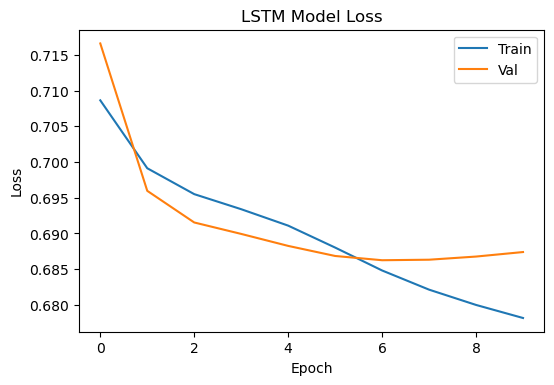

In [124]:
#Dense Model Loss
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [125]:
dense_pred = dense_model.predict(test_generator)
dense_pred = pd.Series(dense_pred.flatten())

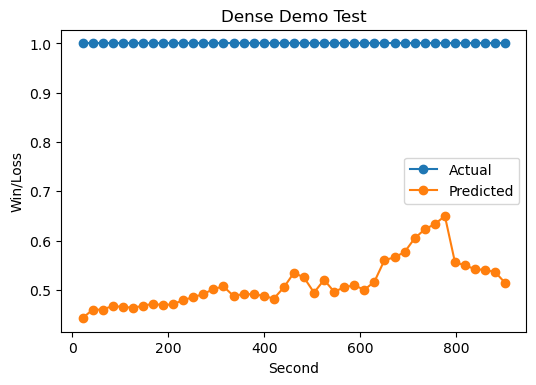

In [126]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, dense_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('Dense Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [127]:
#SIMPLE RNN MODEL

simple_model = tf.keras.Sequential()
simple_model.add(tf.keras.layers.SimpleRNN(units=123, activation='sigmoid', return_sequences=True, input_shape=(win_length, num_features)))
simple_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

simple_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_simple = simple_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['Simple'] = simple_model.evaluate(val_generator)
performance['Simple'] = simple_model.evaluate(test_generator, verbose=0)

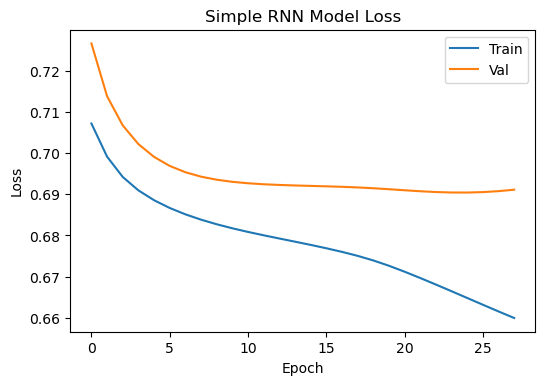

In [129]:
#Simple RNN Model Loss
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])
plt.title('Simple RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [130]:
simple_pred = simple_model.predict(test_generator)
simple_pred = pd.Series(simple_pred.flatten())

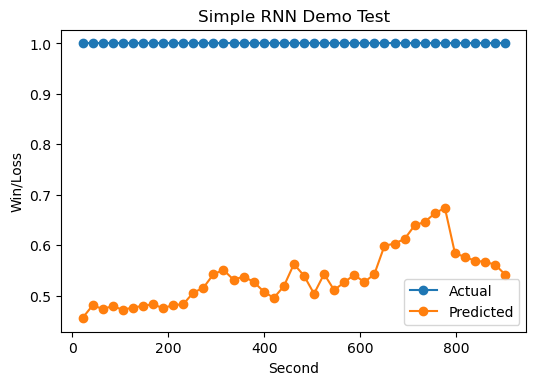

In [131]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, simple_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('Simple RNN Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [115]:
#LSTM MODEL
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
lstm_model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

lstm_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_lstm = lstm_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['LSTM'] = lstm_model.evaluate(val_generator)
performance['LSTM'] = lstm_model.evaluate(test_generator, verbose=0)

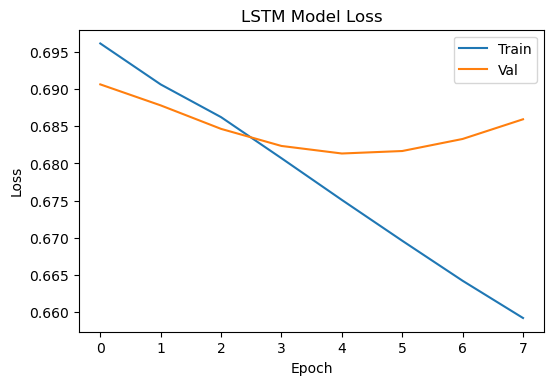

In [117]:
#LSTM Model Loss
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [118]:
lstm_pred = lstm_model.predict(test_generator)
lstm_pred = pd.Series(lstm_pred.flatten())

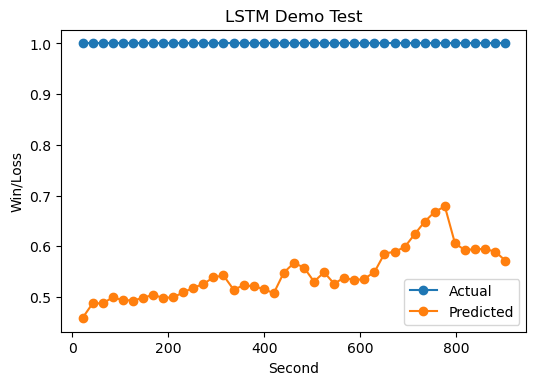

In [119]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, lstm_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('LSTM Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [133]:
#GRU MODEL

gru_model = tf.keras.models.Sequential()
gru_model.add(tf.keras.layers.GRU(32, return_sequences=True, input_shape=(win_length, num_features)))
gru_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

MAX_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

gru_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

history_gru = gru_model.fit(train_generator, epochs=MAX_EPOCHS,
                      validation_data=(val_generator),
                     callbacks=[early_stopping], shuffle=False)

val_performance['GRU'] = gru_model.evaluate(val_generator)
performance['GRU'] = gru_model.evaluate(test_generator, verbose=0)

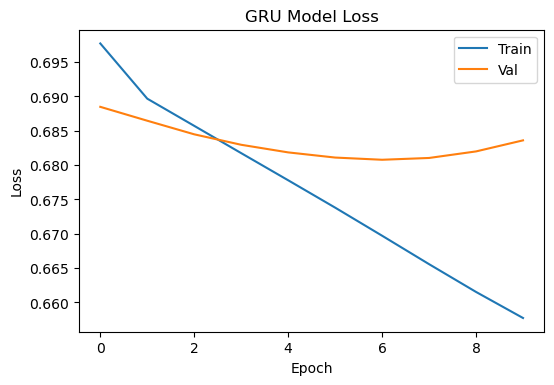

In [135]:
#GRU Model Loss
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [136]:
gru_pred = gru_model.predict(test_generator)
gru_pred = pd.Series(gru_pred.flatten())

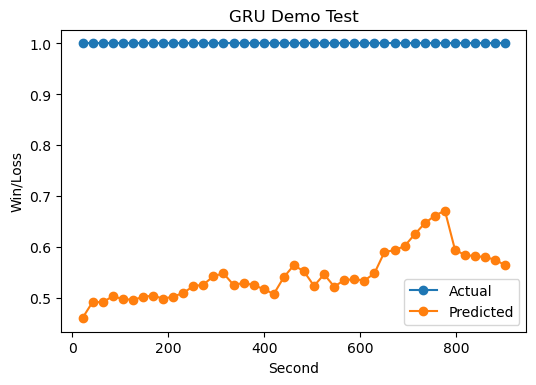

In [137]:
# plotting the line 1 points 
plt.plot(Y_Time, Y_demo_test, label = "Actual", marker='o',)

# plotting the line 2 points 
plt.plot(Y_Time, gru_pred, label = "Predicted", marker='o',)
plt.xlabel('Second')
plt.ylabel('Win/Loss')
# Set a title of the current axes.
plt.title('GRU Demo Test')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

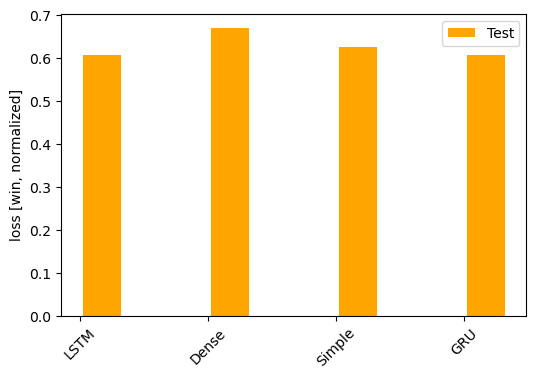

In [138]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x + 0.17, test_loss, width, label='Test', color='orange')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

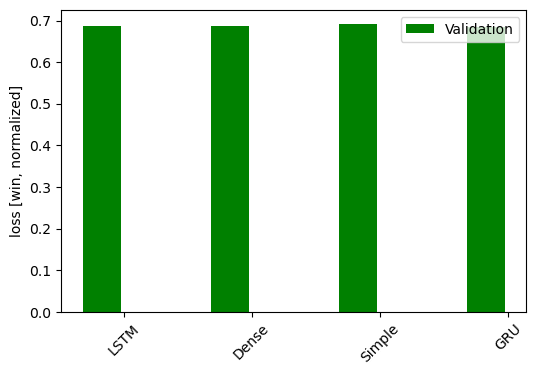

In [139]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x - 0.17, val_loss, width, label='Validation', color='green')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()